<a href="https://colab.research.google.com/github/lorispalmarin/meta-prompting/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta-prompting for Hybrid Fairy-Tales
Comparing Prompt Engineering Strategies Across LLMs



## 1. Setup



### Import Libraries

In [19]:
import os
import re
import json
import string
import torch
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import random
import numpy as np
from typing import List, Tuple
from models.utils import *
import openai
import tiktoken
from tqdm import tqdm

seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

---

### Load Prompt data

I created a JSON containing the prompts


In [11]:
with open('prompts/prompts.json', 'r') as f:
    system_prompts = json.load(f)

system_prompts

[{'Technique': 'Zero-Shot',
  'System': 'Write a fairy tale that blends two contrasting narrative genres. Do not assume any prior context or style. Simply respond with a complete and coherent fairy tale based solely on the genres provided. Use clear language and avoid adding your own framing or interpretations.'},
 {'Technique': 'Role Prompting',
  'System': 'You are a professional fairy tale writer known for your mastery in combining unconventional literary styles. Your task is to write a short fairy tale that skillfully merges two contrasting genres. Your storytelling should demonstrate creative discipline, blending the genres in a balanced way while remaining entertaining and coherent. Maintain a polished tone and ensure that the story reflects the unique narrative features of both genres.'},
 {'Technique': 'Few-Shot',
  'System': 'Below are two examples of how to structure creative fairy tales combining different genres:\n\nExample 1: A cyberpunk-fantasy tale about a magical hacker

### Utils functions import

I imported the functions from utils.py file, containing a set of tools that will be used for computation and visualization scopes.



---

## 2. Prompting plan

For a first view, we can convert the meta-prompts into a Pandas DataFrame and display them.


In [12]:
meta_prompts_df = pd.DataFrame(system_prompts)
meta_prompts_df


,Technique,System
0,Zero-Shot,Write a fairy tale that blends two contrasting...
1,Role Prompting,You are a professional fairy tale writer known...
2,Few-Shot,Below are two examples of how to structure cre...
3,Style Prompting,"Write a fairy tale using rich, evocative langu..."
4,Emotion + Zero-Shot,You are about to write a fairy tale that blend...
5,Emotion + Role Prompting,"You are a dream-weaver, a generative storytell..."


The two genres that will be blended are: **crime** +  **fantasy**


In [13]:
user_prompt = "The fairy tale will mix the two following genres: crime + fantasy"

---

## 3. Generation

In this section, we generate hybrid fairy tales using six different prompting strategies across three large language models (LLMs).
Each story is produced in response to a fixed user instruction — asking the model to generate a fairy tale blending two contrasting narrative genres — and guided by a system prompt that embodies one of the six prompting techniques defined earlier (Zero-Shot, Role Prompting, Few-Shot, Style Prompting, Emotion + Zero-Shot, Emotion + Role Prompting).

---

Each model receives the same pair of inputs:
1. A **system prompt** representing one of the six prompting techniques.
2. A **user prompt** that specifies the genres to be blended (e.g., "Please write a fairy tale that combines horror and comedy.").

This setup allows us to:
- Observe how different prompting strategies shape the story generation process,
- Compare how each model interprets the same input,
- Apply explainability tools to open models to measure which parts of the prompt influence the output most.

### LLaMa

In [ ]:
model_name   = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model     = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
model.eval()

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072)
    (layers): ModuleList(
      (0-27): 28 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (k_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (v_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (up_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((3072,), eps=1e-05)
    (rotary_emb

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.





 Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,271,ĊĊ,-0.119118,0.119118,0.418963,0.808030,"[271, 198, 320, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...","[ĊĊ, Ċ, Ġ(, !, "", #, $, %, &, ', (, ), *, +, ,...","[-0.1191181167960167, -2.5298311710357666, -3...."
1,2,644,In,-0.839423,0.839423,1.033000,0.036896,"[644, 334, 45464, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9...","[In, **, ---ĊĊ, !, "", #, $, %, &, ', (, ), *, ...","[-0.8394226431846619, -0.9287075996398926, -1...."
2,3,279,Ġthe,-0.457406,0.457406,1.054304,0.492119,"[279, 330, 264, 420, 0, 1, 2, 3, 4, 5, 6, 7, 8...","[Ġthe, Ġ"", Ġa, Ġthis, !, "", #, $, %, &, ', (, ...","[-0.45740610361099243, -1.9603816270828247, -2..."
3,4,4363,Ġland,-0.570234,0.570234,1.186491,0.343982,"[4363, 69532, 22651, 26135, 98411, 25284, 0, 1...","[Ġland, Ġmystical, Ġrealm, Ġkingdom, Ġenchante...","[-0.5702343583106995, -1.5077344179153442, -1...."
4,5,315,Ġof,0.000000,-0.000000,-0.000000,1.000000,"[315, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...","[Ġof, !, "", #, $, %, &, ', (, ), *, +, ,, -, ....","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (117 tokens):
In the land of Azura, where magic was woven into everyday life like fabric threads in a tapestry, Detective Ember Stonebrooke solved cases involving supernatural creatures and mysterious disappearances. Her skills were unmatched, but her methods often left people questioning whether justice was truly served.

One dark and stormy night, the mayor of Ravenshire summoned Ember to investigate the theft of the Golden Acorn, an artifact rumored to grant immense power to its possessor. The thief had vanished as suddenly as he appeared, leaving behind only whispers of a midnight ritual performed beneath the ancient Oakwood Tree.



,word,score
46,interpretations.ĊĊThe,14.869141
0,Write,11.953125
1,a,11.398438
56,crime,9.671875
32,the,7.707031
10,.,7.238281
3,tale,6.519531
2,fairy,6.453125
58,fantasy,6.253906
55,:,5.484375


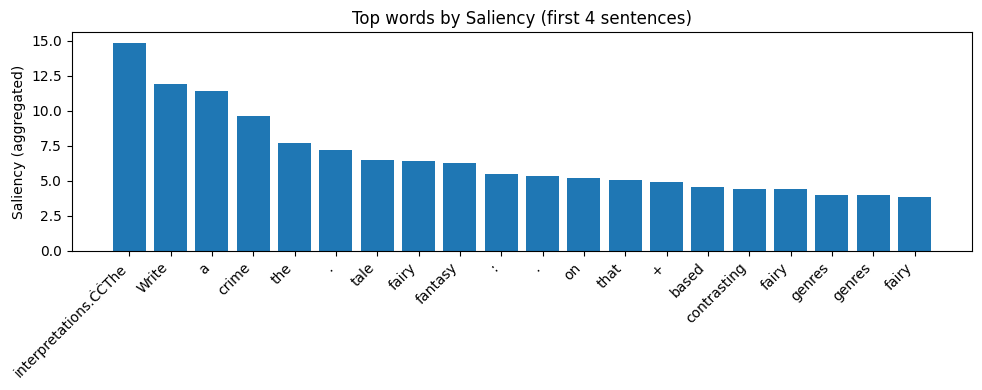

Results correctly exported in dir: llama_results



 Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,271,ĊĊ,-0.490449,0.490449,0.979806,0.367138,"[271, 320, 198, 627, 0, 1, 2, 3, 4, 5, 6, 7, 8...","[ĊĊ, Ġ(, Ċ, .Ċ, !, "", #, $, %, &, ', (, ), *, ...","[-0.49044913053512573, -1.4056274890899658, -2..."
1,2,334,**,-0.313895,0.313895,0.998578,0.644883,"[334, 644, 3936, 8586, 45464, 14711, 0, 1, 2, ...","[**, In, Title, Here, ---ĊĊ, ###, !, "", #, $, ...","[-0.3138945400714874, -2.4567511081695557, -2...."
2,3,3936,Title,-0.249780,0.249780,0.922757,0.708274,"[3936, 37, 38625, 18422, 1, 12755, 92690, 7927...","[Title, F, Genre, Story, "", Short, Crime, Your...","[-0.2497802972793579, -2.6493356227874756, -2...."
3,4,68063,:**,0.000000,-0.000000,-0.000000,1.000000,"[68063, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[:**, !, "", #, $, %, &, ', (, ), *, +, ,, -, ....","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,578,ĠThe,-0.823433,0.823433,0.685668,0.122155,"[330, 578, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1...","[Ġ"", ĠThe, !, "", #, $, %, &, ', (, ), *, +, ,,...","[-0.5778959393501282, -0.8234328031539917, -27..."


Initial 4 sentences (162 tokens):
**Title:** The Shadow Weaver's Enchanting Conspiracy (Crime/Fantasy)

In the mystical realm of Tenebrous, where darkness reigns supreme and magic permeates every fabric, Detective Lyra Flynn strolled through the moonlit streets of Umbra City, her eyes scanning the shadows for any sign of trouble. A skilled investigator with an affinity for the arcane, she had been tracking a series of bizarre occurrences linked to a mysterious figure known only as "The Weave."

Rumors whispered among the citizens hinted at an elaborate scheme involving enchanted looms and forbidden spells, all woven together by The Weave. As Lyra navigated the narrow alleys, she stumbled upon a cryptic message scrawled on a stone wall:

"When twilight descends,
Seek the tapestry's threads.



,word,score
79,crime,10.546875
69,genres.ĊĊThe,9.309570
39,",",8.914062
0,You,5.968750
81,fantasy,5.410156
78,:,4.578125
1,are,4.562500
80,+,4.468750
4,fairy,4.355469
2,a,3.955078


<Figure size 640x480 with 0 Axes>

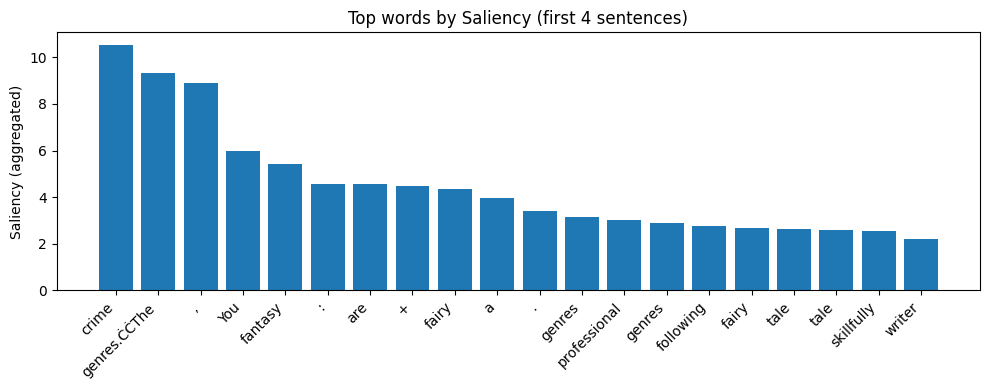

Results correctly exported in dir: llama_results



 Few-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,320,Ġ(,-2.122559,2.122559,1.203043,0.369431,"[271, 198, 320, 382, 4815, 720, 13, 26, 11, 0,...","[ĊĊ, Ċ, Ġ(, .ĊĊ, ĠĊĊ, ĠĊ, ., ;, ,, !, "", #, $,...","[-0.5265756249427795, -1.5087190866470337, -2...."
1,2,62343,detect,-2.751859,2.751859,2.291548,0.005877,"[85454, 2201, 52340, 76, 62343, 64, 61827, 68,...","[crime, no, specific, m, detect, a, fant, e, d...","[-1.3232873678207397, -1.3456090688705444, -2...."
2,3,535,ive,0.000000,-0.000000,-0.000000,1.000000,"[535, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...","[ive, !, "", #, $, %, &, ', (, ), *, +, ,, -, ....","[0.0, -27.63102149963379, -27.63102149963379, ..."
3,4,23347,Ġmystery,-1.482228,1.482228,2.671667,0.091202,"[23347, 22581, 17422, 990, 7493, 8, 489, 17779...","[Ġmystery, Ġsolving, Ġfiction, Ġwork, Ġstories...","[-1.4822276830673218, -1.9956212043762207, -2...."
4,5,449,Ġwith,-1.301807,1.301807,1.978867,0.077404,"[449, 8, 696, 3677, 570, 340, 22581, 4390, 290...","[Ġwith, ), )ĊĊ, ).ĊĊ, )., )Ċ, Ġsolving, ).Ċ, Ġ...","[-1.3018072843551636, -1.636626958847046, -1.7..."


Initial 4 sentences (181 tokens):
(detective mystery with supernatural elements).

### Example Fairy Tale

**Tale Title:** The Shadow Weaver's Enchanted Case File
**Genre Blending:** Crime + Fantasy
**Setting:** Ravenswood Manor, an eerie mansion shrouded by misty fog on the outskirts of Witchwood Forest

---

In the mystical realm of Witchcraft Woods, where shadows danced like silken threads, Detective Elara Wystan stood at the edge of Ravenwood Manor. This foreboding estate had been plagued by paranormal occurrences for months – doors creaking open, disembodied whispers echoing through corridors, and mysterious symbols etched into walls that seemed to pulse with malevolent energy.

Elara, renowned as one of the greatest detectives within Witchwood realms, was summoned by Lady Harriet Blackstone, owner of the manor, to unravel the tangled web of terrors plaguing her home.



,word,score
47,",",12.273438
33,noir-folklore,9.284180
13,genres:ĊĊExample,8.806641
46,village.ĊĊNow,8.696289
17,cyberpunk-fantasy,8.041016
29,forest.ĊExample,7.720703
0,Below,6.800781
42,crimes,6.527344
92,crime,6.210938
1,are,5.421875


<Figure size 640x480 with 0 Axes>

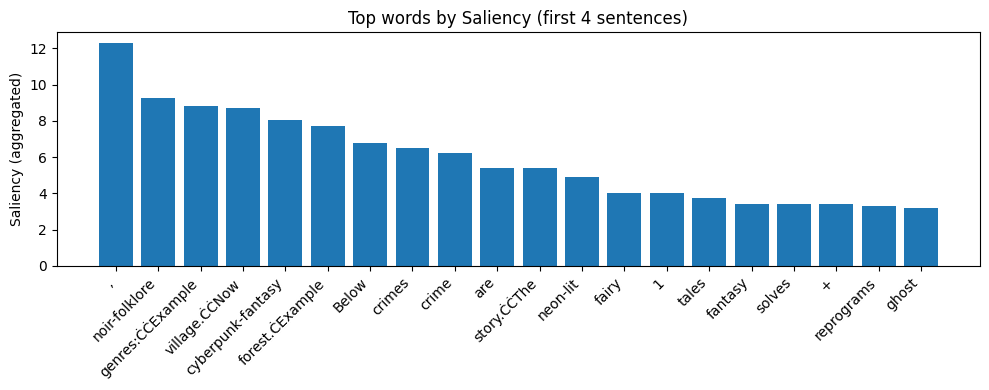

Results correctly exported in dir: llama_results



 Style Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,320,Ġ(,-1.634100,1.634100,0.818343,0.517029,"[271, 320, 198, 4815, 0, 1, 2, 3, 4, 5, 6, 7, ...","[ĊĊ, Ġ(, Ċ, ĠĊĊ, !, "", #, $, %, &, ', (, ), *,...","[-0.3394562900066376, -1.6340997219085693, -2...."
1,2,85454,crime,-1.197264,1.197264,2.290388,0.138546,"[85454, 68, 23449, 92690, 26915, 64, 19221, 27...","[crime, e, dark, Crime, Dark, a, hard, think, ...","[-1.1972641944885254, -1.811102271080017, -1.9..."
2,3,6801,/f,-3.085032,3.085032,2.415138,0.119734,"[2269, 17422, 18884, 489, 93312, 304, 6801, 56...","[-f, Ġfiction, Ġfantasy, Ġ+, +f, Ġin, /f, Ġnoi...","[-1.2100324630737305, -1.7234258651733398, -2...."
3,4,98037,antasy,0.000000,-0.000000,-0.000000,1.000000,"[98037, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[antasy, !, "", #, $, %, &, ', (, ), *, +, ,, -...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,63558,Ġmash,-0.755464,0.755464,1.428194,0.148347,"[63558, 26038, 696, 570, 49480, 3677, 17779, 2...","[Ġmash, Ġhybrid, )ĊĊ, )., Ġcrossover, ).ĊĊ, Ġg...","[-0.7554638981819153, -1.1349270343780518, -2...."


Initial 4 sentences (125 tokens):
(crime/fantasy mashup)

**Story Premise**

In the mist-shrouded city of Ravenshire, where shadows writhe like living darkness, Detective Emilia Grey has been tasked with solving a string of bizarre occurrences. People have gone missing in the dead of night, leaving behind only whispers of an eerie melody. As she delves deeper into the mystery, she discovers that these vanishings are linked to an ancient curse – one born from the darkest corners of magic.

As Emilia navigates this treacherous world, she finds herself entwined in a web of secrets, lies, and forgotten lore.



,word,score
62,immersive.ĊĊThe,14.404297
72,crime,9.398438
0,Write,9.195312
1,a,8.289062
73,+,8.156250
74,fantasy,7.113281
6,",",6.839844
71,:,5.941406
69,following,5.367188
70,genres,5.011719


<Figure size 640x480 with 0 Axes>

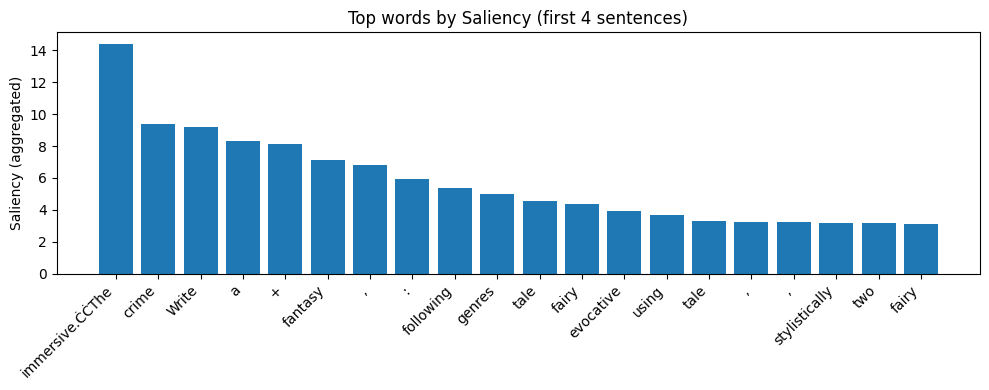

Results correctly exported in dir: llama_results



 Emotion + Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,198,Ċ,-1.785951,1.785951,0.749478,0.588710,"[271, 198, 320, 4815, 0, 1, 2, 3, 4, 5, 6, 7, ...","[ĊĊ, Ċ, Ġ(, ĠĊĊ, !, "", #, $, %, &, ', (, ), *,...","[-0.27925413846969604, -1.7859508991241455, -2..."
1,2,334,**,-1.801668,1.801668,2.370225,0.107662,"[644, 334, 32, 3936, 92690, 38625, 8586, 1, 45...","[In, **, A, Title, Crime, Genre, Here, "", ---Ċ...","[-1.2994364500045776, -1.8016680479049683, -2...."
2,3,37,F,-3.478171,3.478171,2.650839,0.006701,"[38625, 3936, 7927, 92690, 9290, 62, 37, 5618,...","[Genre, Title, Your, Crime, Note, _, F, Please...","[-1.5920103788375854, -1.6254918575286865, -2...."
3,4,22704,airy,0.000000,-0.000000,-0.000000,1.000000,"[22704, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[airy, !, "", #, $, %, &, ', (, ), *, +, ,, -, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,55448,ĠTale,0.000000,-0.000000,-0.000000,1.000000,"[55448, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[ĠTale, !, "", #, $, %, &, ', (, ), *, +, ,, -,...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (114 tokens):
**Fairy Tale Crystals**

In the sleepy town of Ravenswood, nestled in the heart of Whispering Woods, strange occurrences began to plague its residents. It started with small things: tools gone missing, food left uneaten on plates, and eerie whispers in the dead of night. At first, no one suspected anything out of the ordinary, but as time passed, these events escalated into full-blown mysteries. Residents found their homes burglarized while they slept, only to return home hours later to discover nothing was taken except for an assortment of peculiar crystals.



,word,score
78,provided.ĊĊThe,16.939453
0,You,16.031250
1,are,12.968750
88,crime,10.265625
2,about,9.578125
32,genresâĢĶembrace,9.065430
3,to,8.757812
79,fairy,7.500000
7,tale,7.398438
43,",",6.859375


<Figure size 640x480 with 0 Axes>

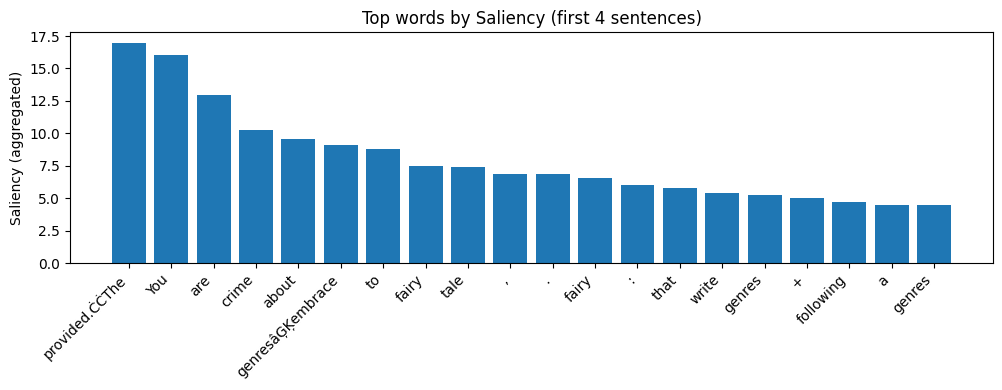

Results correctly exported in dir: llama_results



 Emotion + Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,198,Ċ,-1.675466,1.675466,0.987057,0.451819,"[271, 198, 320, 627, 0, 1, 2, 3, 4, 5, 6, 7, 8...","[ĊĊ, Ċ, Ġ(, .Ċ, !, "", #, $, %, &, ', (, ), *, ...","[-0.4477877616882324, -1.6754660606384277, -1...."
1,2,3936,Title,-1.258451,1.258451,1.707097,0.112981,"[334, 3936, 644, 10227, 8586, 1, 32, 92690, 38...","[**, Title, In, ""The, Here, "", A, Crime, Genre...","[-0.9236313104629517, -1.2584511041641235, -2...."
2,3,6848,Ġideas,-4.452065,4.452065,1.146024,0.272117,"[25, 315, 512, 68063, 18726, 6848, 369, 23748,...","[:, Ġof, :Ċ, :**, Ġsuggestions, Ġideas, Ġfor, ...","[-0.5644168853759766, -1.215457797050476, -2.6..."
3,4,512,:Ċ,-0.677403,0.677403,1.033819,0.253667,"[512, 369, 1473, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,...","[:Ċ, Ġfor, :ĊĊ, !, "", #, $, %, &, ', (, ), *, ...","[-0.6774030923843384, -1.369368076324463, -1.4..."
4,5,16,1,-0.528836,0.528836,1.301333,0.422330,"[16, 12, 9, 1, 32, 10227, 26915, 334, 92690, 6...","[1, -, *, "", A, ""The, Dark, **, Crime, âĢ¢, ĠĠ...","[-0.5288357138633728, -1.789995551109314, -1.9..."


Initial 4 sentences (47 tokens):
Title ideas:
1. The Phantom Thief's Enchantment (steampunk detective)
2. Whispers in Shadows (dark mythology retelling)
3. The Shadow Weaver (urban noir with magical realism)

Which one do I choose?



,word,score
4,",",49.468750
76,surprise.ĊĊThe,42.871094
0,You,30.906250
3,dream-weaver,25.703125
86,crime,21.234375
19,Given,21.031250
1,are,20.781250
83,following,20.078125
88,fantasy,18.453125
23,",",16.531250


<Figure size 640x480 with 0 Axes>

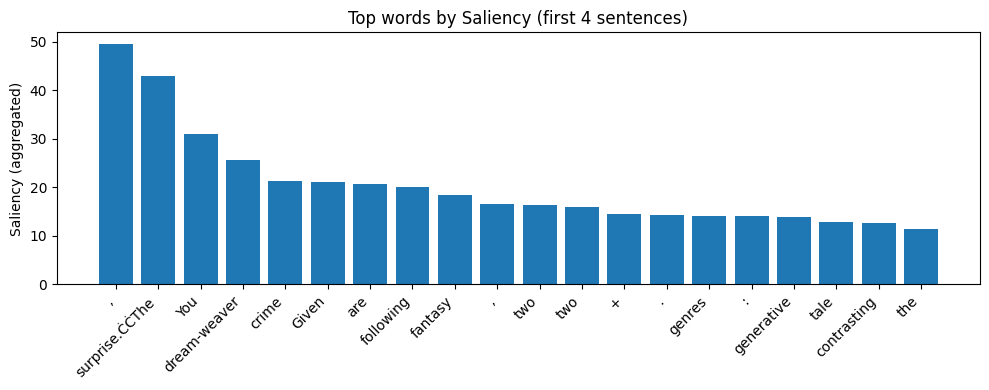

Results correctly exported in dir: llama_results


<Figure size 640x480 with 0 Axes>

In [ ]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "meta-llama/Llama-3.2-3B-Instruct"
    prompt       = full_prompt
    max_new_tok  = 800
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "llama_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)

### Mistral

In [ ]:
from transformers import BitsAndBytesConfig
import torch

bnb = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.bfloat16
)

model_name   = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    "mistralai/Mistral-7B-Instruct-v0.2",
    device_map="auto",
    quantization_config=bnb,
    use_cache=False
).eval()

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.





 Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,28723,.,-0.214112,0.214112,0.490174,0.614517,"[28723, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...","[., <0x0A>, <unk>, <s>, </s>, <0x00>, <0x01>, ...","[-0.2141115814447403, -1.646404504776001, -27...."
1,2,13,<0x0A>,-0.038125,0.038125,0.159615,0.925186,"[13, 4003, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1...","[<0x0A>, ▁Here, <unk>, <s>, </s>, <0x00>, <0x0...","[-0.038124699145555496, -3.285892963409424, -2..."
2,3,13940,``,-2.194071,2.194071,0.349561,0.777076,"[7395, 13940, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10...","[---, ``, <unk>, <s>, </s>, <0x00>, <0x01>, <0...","[-0.1181778609752655, -2.1940712928771973, -27..."
3,4,28832,`,0.000000,-0.000000,-0.000000,1.000000,"[28832, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[`, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,13,<0x0A>,0.000000,-0.000000,-0.000000,1.000000,"[13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,...","[<0x0A>, <unk>, <s>, </s>, <0x00>, <0x01>, <0x...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (107 tokens):
.
```
Once upon a time, in the enchanted land of Eldoria, there was a cunning fox named Fawkes. He lived amongst the verdant forests and rolling hills, but his heart harbored an insidious desire—he longed to steal the precious gemstone known as the Star of Avalon. This radiant jewel lay nestled within the impenetrable fortress of King Thaddeus, who ruled over the prosperous kingdom of Avondale.



,word,score
47,.<0x0A><0x0A>The,196.062500
55,genres,93.875000
57,crime,90.625000
56,:,72.687500
2,fairy,66.031250
50,will,64.312500
54,following,62.343750
1,a,60.656250
9,genres,59.812500
58,+,58.656250


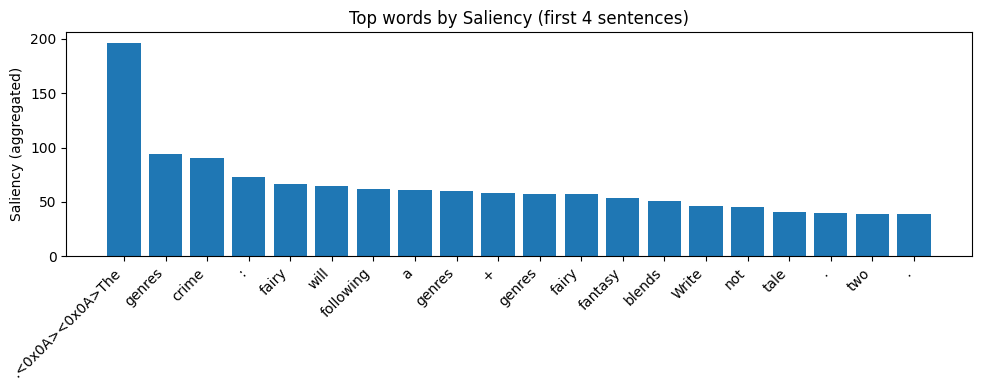

Results correctly exported in dir: mistral_results



 Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,28723,.,-0.128086,0.128086,0.367368,0.759555,"[28723, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...","[., <0x0A>, <unk>, <s>, </s>, <0x00>, <0x01>, ...","[-0.128086119890213, -2.1184120178222656, -27...."
1,2,13,<0x0A>,-2.004375,2.004375,1.347470,0.086266,"[415, 4003, 13, 28705, 560, 0, 1, 2, 3, 4, 5, ...","[▁The, ▁Here, <0x0A>, ▁, ▁In, <unk>, <s>, </s>...","[-0.8845813870429993, -1.1189563274383545, -2...."
2,3,7522,Title,-0.449673,0.449673,1.018033,0.431224,"[7522, 13940, 7395, 700, 1177, 0, 1, 2, 3, 4, ...","[Title, ``, ---, </, ----------------, <unk>, ...","[-0.4496728181838989, -1.5769062042236328, -2...."
3,4,28747,:,0.000000,-0.000000,-0.000000,1.000000,"[28747, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[:, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,415,▁The,0.000000,-0.000000,-0.000000,1.000000,"[415, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...","[▁The, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (97 tokens):
.
Title: The Enchanted Heist

Once upon a time, in a bustling city shrouded by an eternal fog, there existed a notorious thief named Elric. With his cunning mind and nimble fingers, he had stolen countless treasures from the wealthiest citizens without leaving a trace behind. However, despite his successes, Elric yearned for more than just material possessions - he craved the thrill of magic.



,word,score
70,.<0x0A><0x0A>The,80.414062
80,crime,73.937500
82,fantasy,49.812500
78,genres,47.296875
4,fairy,45.937500
77,following,34.718750
81,+,33.062500
79,:,31.406250
2,a,29.625000
28,merges,29.156250


<Figure size 640x480 with 0 Axes>

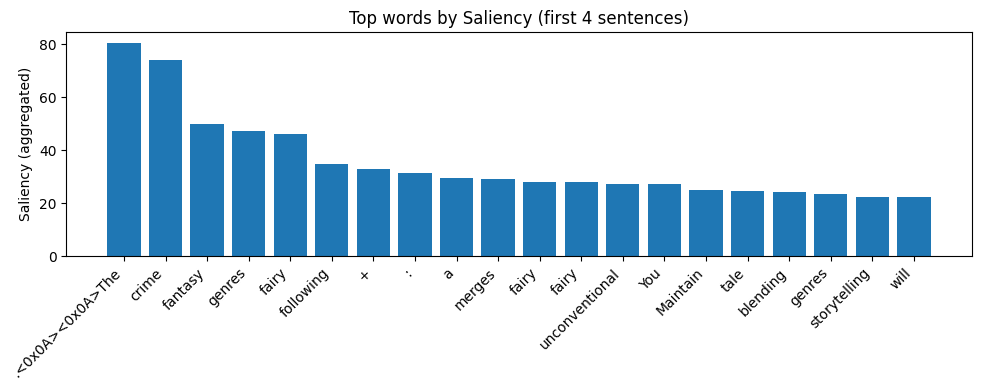

Results correctly exported in dir: mistral_results



 Few-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,28723,.,-1.013157,1.013157,0.870325,0.206422,"[325, 28723, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,...","[▁(, ., <0x0A>, <unk>, <s>, </s>, <0x00>, <0x0...","[-0.5630096197128296, -1.0131573677062988, -2...."
1,2,560,▁In,-0.634843,0.634843,1.298805,0.303076,"[560, 415, 13, 5670, 4003, 3604, 0, 1, 2, 3, 4...","[▁In, ▁The, <0x0A>, ▁Create, ▁Here, ▁Your, <un...","[-0.6348428726196289, -1.483057975769043, -2.1..."
2,3,456,▁this,0.000000,-0.000000,-0.000000,1.000000,"[456, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...","[▁this, <unk>, <s>, </s>, <0x00>, <0x01>, <0x0...","[0.0, -27.63102149963379, -27.63102149963379, ..."
3,4,2838,▁story,-1.785330,1.785330,1.986882,0.178754,"[15642, 2838, 3199, 481, 2751, 4842, 1526, 266...","[▁tale, ▁story, ▁dark, ▁en, ▁version, ▁unique,...","[-1.0598852634429932, -1.7853299379348755, -2...."
4,5,28725,",",0.000000,-0.000000,-0.000000,1.000000,"[28725, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[,, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (80 tokens):
. In this story, the enchanted town of Everwood has been plagued by burglaries for months. The thief leaves no trace, and every stolen item turns up at an underground market known as the "Moon Market." The townsfolk turn to their last hope—a legendary detective named Morwen, famed for his uncanny ability to sense the supernatural.



,word,score
14,:<0x0A><0x0A>Example,118.234375
100,crime,115.000000
90,.<0x0A><0x0A>The,99.656250
102,fantasy,95.250000
9,fairy,71.937500
52,.<0x0A><0x0A>Now,65.500000
37,noir,64.515625
38,-folklore,62.148438
98,genres,61.171875
19,-fantasy,59.851562


<Figure size 640x480 with 0 Axes>

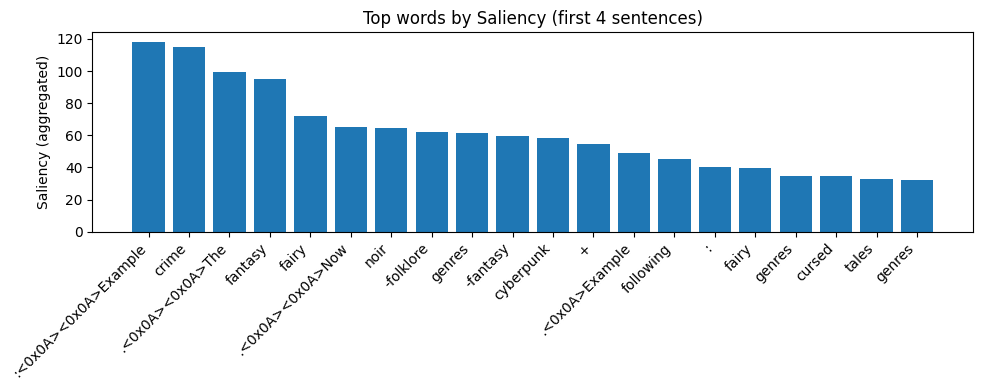

Results correctly exported in dir: mistral_results



 Style Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,28723,.,-0.407102,0.407102,0.637267,0.331152,"[28723, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...","[., <0x0A>, <unk>, <s>, </s>, <0x00>, <0x01>, ...","[-0.40710219740867615, -1.0953459739685059, -2..."
1,2,4003,▁Here,-0.676792,0.676792,1.360173,0.220588,"[4003, 13, 13623, 315, 560, 415, 3169, 851, 0,...","[▁Here, <0x0A>, ▁Title, ▁I, ▁In, ▁The, ▁Let, ▁...","[-0.6767921447753906, -1.2459888458251953, -2...."
2,3,28742,',0.000000,-0.000000,-0.000000,1.000000,"[28742, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[', <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
3,4,28713,s,0.000000,-0.000000,-0.000000,1.000000,"[28713, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[s, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,586,▁my,-1.464264,1.464264,0.669282,0.506944,"[396, 586, 264, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...","[▁an, ▁my, ▁a, <unk>, <s>, </s>, <0x00>, <0x01...","[-0.30355095863342285, -1.464264154434204, -3...."


Initial 4 sentences (147 tokens):
. Here's my attempt:

Once upon an enchanted midnight in the realm of Eldoria, where moonbeams danced on the silken leaves of whispering trees, there existed an illicit secret. Hidden deep within the heart of this mystical land was the precious Amber Crystal, said to possess unimaginable powers—powers coveted by malevolent creatures lurking beyond Eldorian borders.
This tranquil idyll was shattered when the sinister Lord Malachite, with his obsidian eyes glinting like twin moons swallowed by eternal night, cast a wicked spell over the once-happy village of Bellefleur.



,word,score
63,.<0x0A><0x0A>The,100.054688
1,a,91.750000
0,Write,84.062500
2,fairy,70.000000
73,crime,52.875000
7,evocative,48.117188
3,tale,39.062500
56,stylistically,39.007812
74,+,38.812500
70,following,37.031250


<Figure size 640x480 with 0 Axes>

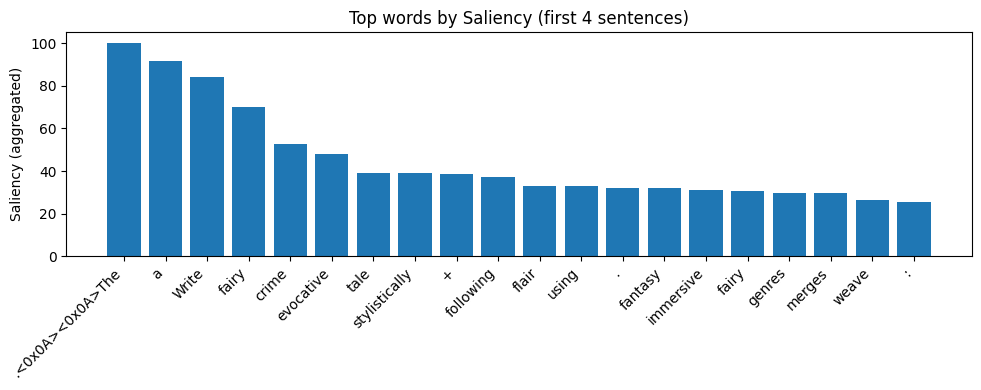

Results correctly exported in dir: mistral_results



 Emotion + Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,13,<0x0A>,-1.222920,1.222920,0.606018,0.411261,"[28723, 13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...","[., <0x0A>, <unk>, <s>, </s>, <0x00>, <0x01>, ...","[-0.34866347908973694, -1.2229195833206177, -2..."
1,2,13,<0x0A>,-0.034042,0.034042,0.146601,0.933062,"[13, 1177, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1...","[<0x0A>, ----------------, <unk>, <s>, </s>, <...","[-0.0340418666601181, -3.3971362113952637, -27..."
2,3,7522,Title,-1.729643,1.729643,1.331113,0.016540,"[7395, 16114, 7522, 9872, 2198, 348, 0, 1, 2, ...","[---, Once, Title, Gen, As, **, <unk>, <s>, </...","[-0.9707123041152954, -1.0153557062149048, -1...."
3,4,28747,:,0.000000,-0.000000,-0.000000,1.000000,"[28747, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[:, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>, ...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,415,▁The,0.000000,-0.000000,-0.000000,1.000000,"[415, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12...","[▁The, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (123 tokens):
Title: The Crimson Moon's Wicked Whispers

Once upon a time in the mystical land of Eldrida, nestled among the lush, emerald hills and deep blue valleys, there was an idyllic village known as Thistlenest. This quaint hamlet boasted the most vibrant gardens, the sweetest fruit orchards, and the kindest inhabitants. Yet beneath this peaceful veneer lurked a sinister secret. For unbeknownst to all but one, an insidious curse had claimed their joyous community.



,word,score
90,crime,60.531250
80,.<0x0A><0x0A>The,52.882812
92,fantasy,37.812500
4,write,33.750000
88,genres,33.664062
81,fairy,32.781250
6,fairy,31.890625
2,about,30.000000
0,You,29.765625
59,contradictory,28.675781


<Figure size 640x480 with 0 Axes>

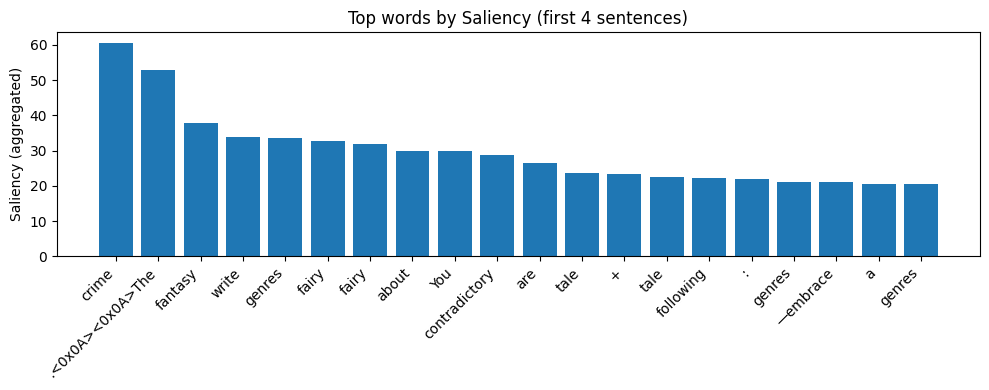

Results correctly exported in dir: mistral_results



 Emotion + Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,13,<0x0A>,-1.940826,1.940826,0.668352,0.636685,"[28723, 13, 28748, 0, 1, 2, 3, 4, 5, 6, 7, 8, ...","[., <0x0A>, /, <unk>, <s>, </s>, <0x00>, <0x01...","[-0.2481149137020111, -1.9408257007598877, -2...."
1,2,13,<0x0A>,-0.048248,0.048248,0.222307,0.926988,"[13, 1177, 7522, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,...","[<0x0A>, ----------------, Title, <unk>, <s>, ...","[-0.04824819788336754, -3.6531598567962646, -3..."
2,3,28730,_,-4.264880,4.264880,2.085548,0.199327,"[7395, 7522, 348, 18789, 11159, 9872, 2198, 15...","[---, Title, **, Cr, Your, Gen, As, Here, Exam...","[-0.961308479309082, -1.6979150772094727, -2.4..."
3,4,7522,Title,-0.489843,0.489843,1.285751,0.435204,"[7522, 20275, 18789, 9872, 11159, 19967, 28739...","[Title, Example, Cr, Gen, Your, Prom, "", A, F,...","[-0.4898430109024048, -1.728681206703186, -2.4..."
4,5,19746,:_,0.000000,-0.000000,-0.000000,1.000000,"[19746, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[:_, <unk>, <s>, </s>, <0x00>, <0x01>, <0x02>,...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (135 tokens):
_Title:_ The Enchanted Detective Agency

Deep in the heart of _Mystic City_, nestled among its towering spires and labyrinthine streets, lies an extraordinary detective agency known as "_Enchanted Investigations._" Here, under one roof, the most brilliant minds of Mystic City come together to solve the peculiar mysteries that plague their world. The inhabitants of this city live side by side with beings from every corner of the magical realm; elves, mermaids, werewolves, even talking cats. And yet, despite this fantastical environment, there remains a darker side to life.



,word,score
78,.<0x0A><0x0A>The,83.843750
4,-weaver,82.734375
88,crime,57.781250
7,generative,48.828125
8,storyteller,45.781250
0,You,41.687500
50,enchantment,40.035156
90,fantasy,38.562500
2,a,37.187500
86,genres,35.515625


<Figure size 640x480 with 0 Axes>

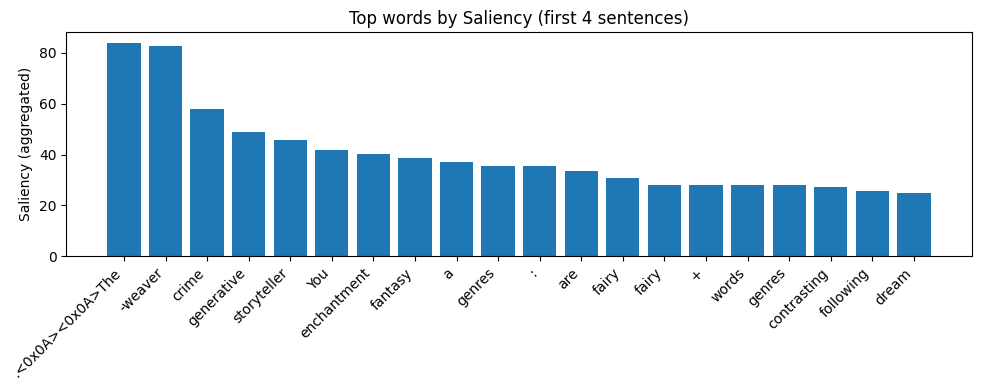

Results correctly exported in dir: mistral_results


<Figure size 640x480 with 0 Axes>

In [ ]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "mistralai/Mistral-7B-Instruct-v0.1"
    prompt       = full_prompt
    max_new_tok  = 500
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "mistral_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)

### Falcon

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "tiiuae/Falcon3-1B-Instruct-1.58bit"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
  model_id,
  torch_dtype=torch.bfloat16,
).to("cuda")




 Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,12,Ċ,-3.440488,3.440488,1.187328,0.179166,"[2035, 2037, 12, 2226, 2303, 6632, 14324, 2038...","[,, ., Ċ, Ġ, Ġin, Ġelements, Ġgenre, /, >>TITL...","[-0.6428676247596741, -1.0595355033874512, -3...."
1,2,2051,<,0.000000,-0.000000,-0.000000,1.000000,"[2051, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[<, >>TITLE<<, >>ABSTRACT<<, >>INTRODUCTION<<,...","[0.0, -27.63102149963379, -27.63102149963379, ..."
2,3,2115,|,0.000000,-0.000000,-0.000000,1.000000,"[2115, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[|, >>TITLE<<, >>ABSTRACT<<, >>INTRODUCTION<<,...","[0.0, -27.63102149963379, -27.63102149963379, ..."
3,4,91961,assistant,0.000000,-0.000000,-0.000000,1.000000,"[91961, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[assistant, >>TITLE<<, >>ABSTRACT<<, >>INTRODU...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,100846,|>,0.000000,-0.000000,-0.000000,1.000000,"[100846, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,...","[|>, >>TITLE<<, >>ABSTRACT<<, >>INTRODUCTION<<...","[0.0, -27.63102149963379, -27.63102149963379, ..."


Initial 4 sentences (156 tokens):
<|assistant|>
Once upon a time, in the bustling city of Lumina, lived an enchanting fairy named Elara who had been called to protect her world from the dark forces threatening its harmony. In this magical realm where magic blended seamlessly with technology, she found herself entangled in an unexpected adventure as the shadowy organization known as The Dark Illuminators sought out ancient artifacts rumored to hold the key to unlocking their hidden powers.
Elara's quest led her into the heart of Luminaria's underworld—a place filled with darkness and deceit, yet also brimming with hope and resilience among those fighting against evil.
As Elara delved deeper into the dark secrets surrounding these creatures, she discovered shocking truths about human nature—stories of love lost and friendships fractured by fear.



,word,score
59,fantasy,0.291016
56,:,0.126953
25,and,0.123047
58,+,0.106201
35,.,0.096680
26,coherent,0.089844
57,crime,0.049316
3,tale,0.035400
48,fairy,0.034180
10,.,0.032959


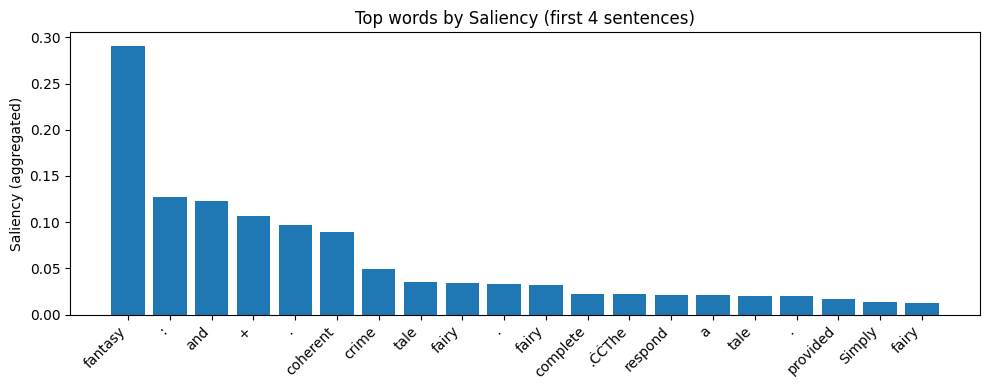

Results correctly exported in dir: falcon_results



 Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,2226,Ġ,-2.842205,2.842205,1.004099,0.640554,"[2037, 6632, 13567, 2226, 2035, 12, 2368, 0, 1...","[., Ġelements, Ġfiction, Ġ, ,, Ċ, Ġwith, >>TIT...","[-0.3124447166919708, -2.3957767486572266, -2...."
1,2,2052,=,-1.102015,1.102015,0.981921,0.235421,"[2031, 2052, 2036, 2034, 0, 1, 2, 3, 4, 5, 6, ...","[(, =, -, +, >>TITLE<<, >>ABSTRACT<<, >>INTROD...","[-0.5663003921508789, -1.1020156145095825, -2...."
2,3,33313,ĠMystery,-3.845008,3.845008,3.148547,0.090359,"[2226, 11378, 29934, 9408, 16531, 10706, 15426...","[Ġ, Ġmurder, Ġthriller, Ġcrime, Ġmagical, Ġmag...","[-1.7170318365097046, -2.4164366722106934, -2...."
3,4,2226,Ġ,-0.779270,0.779270,2.018477,0.294440,"[2226, 2038, 2037, 13472, 23288, 8052, 2036, 4...","[Ġ, /, ., ĠStory, ĠAdventure, ĠScience, -, ĠNo...","[-0.7792701125144958, -1.8060569763183594, -2...."
4,5,2034,+,-1.481421,1.481421,0.646809,0.520244,"[2029, 2034, 2031, 0, 1, 2, 3, 4, 5, 6, 7, 8, ...","[&, +, (, >>TITLE<<, >>ABSTRACT<<, >>INTRODUCT...","[-0.2909431457519531, -1.4814205169677734, -3...."


Initial 4 sentences (43 tokens):
= Mystery + Fantasy. The genre must be engaging but also contain an element of moral dilemma. Use vivid descriptions with detailed character actions and dialogue to convey these elements seamlessly. Remember to maintain coherence throughout the piece.



,word,score
81,+,0.955078
25,tale,0.421875
82,fantasy,0.359375
24,fairy,0.232422
70,.ĊĊThe,0.187363
80,crime,0.159180
23,short,0.125000
51,coherent,0.099121
32,.,0.093262
50,and,0.091797


<Figure size 640x480 with 0 Axes>

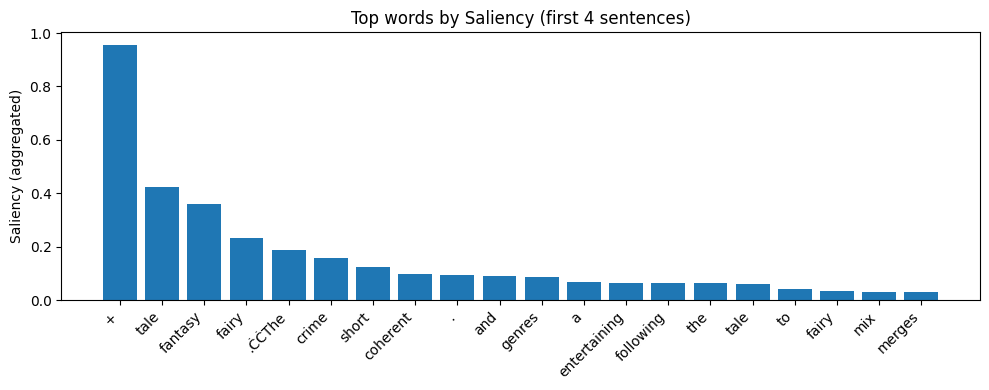

Results correctly exported in dir: falcon_results



 Few-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,2037,.,-0.846732,0.846732,1.657278,0.225047,"[2037, 2226, 12, 2038, 2035, 2050, 6632, 2263,...","[., Ġ, Ċ, /, ,, ;, Ġelements, ĠĠ, Ġor, Ġwith, ...","[-0.8467319011688232, -1.5907790660858154, -1...."
1,2,2667,ĠIt,-1.546343,1.546343,1.289049,0.408913,"[2427, 2667, 5559, 12, 2787, 5850, 7375, 2911,...","[ĠThe, ĠIt, ĠHere, Ċ, ĠThis, ĠPlease, ĠEach, Ġ...","[-0.4749143123626709, -1.5463426113128662, -3...."
2,3,3336,Ġmust,-1.830813,1.830813,1.065565,0.508536,"[2889, 3336, 2340, 2030, 2369, 2536, 0, 1, 2, ...","[Ġshould, Ġmust, Ġis, ', âĢĻ, Ġhas, >>TITLE<<,...","[-0.4022413492202759, -1.830812931060791, -2.3..."
3,4,2351,Ġbe,-0.158491,0.158491,0.629061,0.804416,"[2351, 4427, 2458, 3941, 2453, 2662, 0, 1, 2, ...","[Ġbe, Ġcontain, Ġhave, Ġinclude, Ġnot, Ġalso, ...","[-0.1584913730621338, -3.015634775161743, -3.1..."
4,5,4400,Ġtold,-0.804736,0.804736,2.174428,0.340033,"[4400, 5355, 2861, 12864, 2296, 2426, 13442, 6...","[Ġtold, Ġwritten, Ġset, Ġengaging, Ġan, Ġat, Ġ...","[-0.8047361373901367, -2.2333078384399414, -2...."


Initial 4 sentences (113 tokens):
. It must be told from the perspective of an anthropomorphic character named "Arabella," she is a young girl growing up with her magical abilities but has not yet been able to use them properly due to an accident during a tragic incident at school. The plot should have the sequence of events below and each part of it needs to include some action that makes sense within its genre. As far as I can tell there isn't any other way around this situation since I already started writing all my characters backstory after the first one except for their name or age.



,word,score
90,.ĊĊThe,0.111801
66,fairy,0.058105
101,+,0.056030
33,.ĊExample,0.045300
102,fantasy,0.041504
92,tale,0.039551
23,magical,0.037842
27,dreams,0.037598
91,fairy,0.034668
13,genres,0.031982


<Figure size 640x480 with 0 Axes>

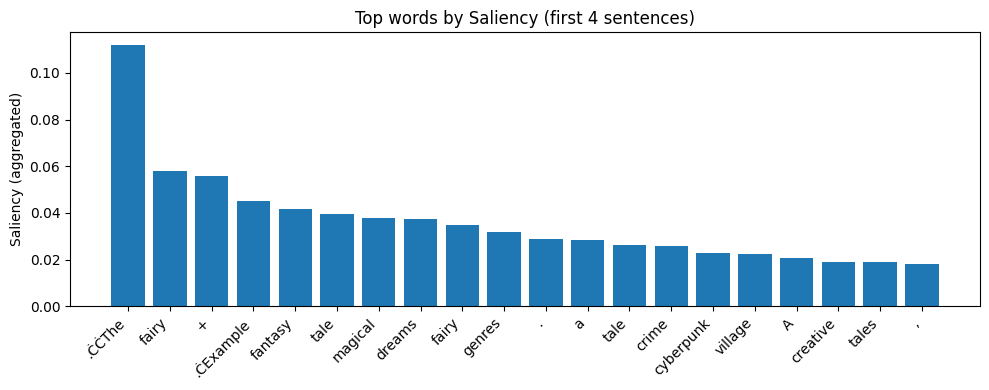

Results correctly exported in dir: falcon_results



 Style Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,2037,.,-0.368744,0.368744,1.236602,0.605488,"[2037, 2226, 6632, 12, 13567, 2038, 2035, 2303...","[., Ġ, Ġelements, Ċ, Ġfiction, /, ,, Ġin, Ġwit...","[-0.3687439560890198, -2.4520797729492188, -2...."
1,2,2667,ĠIt,-1.192505,1.192505,2.609740,0.199519,"[2667, 2787, 2594, 12, 2911, 5559, 12218, 2427...","[ĠIt, ĠThis, ĠIn, Ċ, ĠYou, ĠHere, ĠWrite, ĠThe...","[-1.1925047636032104, -2.263932943344116, -2.3..."
2,3,2030,',-1.624336,1.624336,1.680681,0.284154,"[3336, 2030, 2369, 9092, 2536, 2889, 7580, 303...","[Ġmust, ', âĢĻ, Ġbegins, Ġhas, Ġshould, Ġstart...","[-0.7314795851707458, -1.6243361234664917, -2...."
3,4,2106,s,0.000000,-0.000000,-0.000000,1.000000,"[2106, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1...","[s, >>TITLE<<, >>ABSTRACT<<, >>INTRODUCTION<<,...","[0.0, -27.63102149963379, -27.63102149963379, ..."
4,5,3520,Ġimportant,-0.168820,0.168820,0.728602,0.796150,"[3520, 2861, 5355, 2296, 2604, 10442, 6546, 24...","[Ġimportant, Ġset, Ġwritten, Ġan, Ġabout, Ġcru...","[-0.16881971061229706, -3.025963068008423, -3...."


Initial 4 sentences (52 tokens):
. It's important to remember that you can incorporate elements from both genres without losing their essence. You need not explicitly label it as such but rather imply this through stylistic choices or word choice. This must be done delicately so the reader doesn’t notice.



,word,score
74,+,0.270508
63,.ĊĊThe,0.122681
31,.,0.108398
75,fantasy,0.092773
70,following,0.052979
65,tale,0.044678
56,stylistically,0.040489
73,crime,0.040283
52,.,0.031006
71,genres,0.027710


<Figure size 640x480 with 0 Axes>

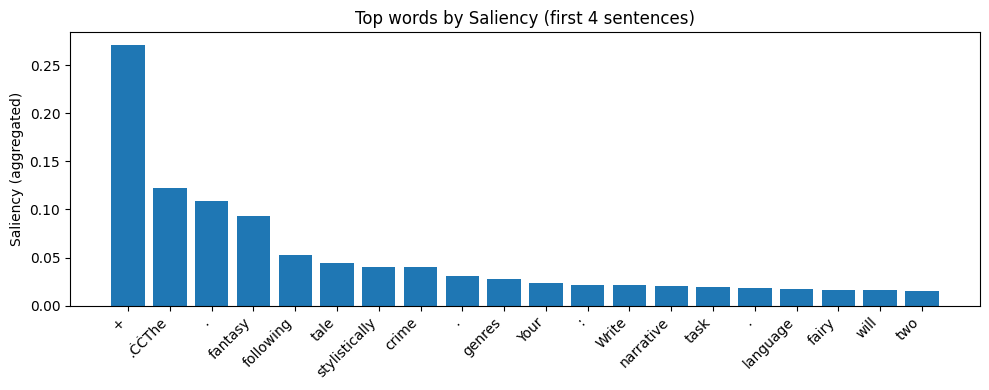

Results correctly exported in dir: falcon_results



 Emotion + Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,2037,.,-0.491995,0.491995,1.435567,0.508887,"[2037, 2226, 13567, 2038, 12, 2303, 6632, 2035...","[., Ġ, Ġfiction, /, Ċ, Ġin, Ġelements, ,, Ġor,...","[-0.49199479818344116, -2.2777099609375, -2.60..."
1,2,2427,ĠThe,-0.559492,0.559492,1.482752,0.337479,"[2427, 2667, 2787, 2911, 5559, 12218, 12, 2594...","[ĠThe, ĠIt, ĠThis, ĠYou, ĠHere, ĠWrite, Ċ, ĠIn...","[-0.5594920516014099, -1.4523487091064453, -3...."
2,3,2813,Ġfirst,-2.749871,2.749871,1.194797,0.635935,"[14324, 10619, 2813, 6536, 3391, 17141, 9548, ...","[Ġgenre, Ġplot, Ġfirst, Ġsetting, Ġmain, Ġtwis...","[-0.33915579319000244, -2.5712990760803223, -2..."
3,4,14324,Ġgenre,-0.023245,0.023245,0.109411,0.954045,"[14324, 2656, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10...","[Ġgenre, Ġpart, >>TITLE<<, >>ABSTRACT<<, >>INT...","[-0.023245446383953094, -3.773245334625244, -2..."
4,5,2340,Ġis,-0.062509,0.062509,0.298658,0.907829,"[2340, 12181, 4722, 2343, 8718, 0, 1, 2, 3, 4,...","[Ġis, Ġdescribes, Ġprovides, Ġyou, Ġtells, >>T...","[-0.06250932067632675, -3.4553658962249756, -4..."


Initial 4 sentences (60 tokens):
. The first genre is murder mystery while the second one is action fantasy. You can choose where these narratives intersect by providing a hint in their titles or through some other element you deem fitting before writing. Please ensure this hybrid work remains engaging and immersive, keeping readers hooked until they finish the last page.



,word,score
87,genres,0.287109
79,.ĊĊThe,0.273071
86,following,0.247070
14,.,0.230469
7,tale,0.197266
6,fairy,0.129883
90,+,0.128906
5,a,0.128906
91,fantasy,0.100586
88,:,0.090820


<Figure size 640x480 with 0 Axes>

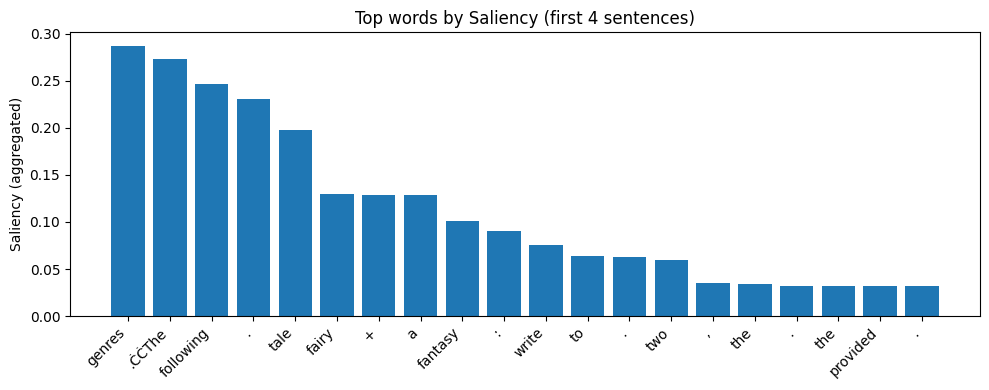

Results correctly exported in dir: falcon_results



 Emotion + Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,2037,.,-0.405796,0.405796,1.260329,0.554698,"[2037, 2226, 12, 13567, 2035, 2038, 6632, 2050...","[., Ġ, Ċ, Ġfiction, ,, /, Ġelements, ;, Ġgenre...","[-0.4057956039905548, -2.1915087699890137, -2...."
1,2,2427,ĠThe,-0.781069,0.781069,1.712382,0.189920,"[2427, 2667, 5559, 2911, 4589, 2787, 2594, 438...","[ĠThe, ĠIt, ĠHere, ĠYou, ĠYour, ĠThis, ĠIn, ĠH...","[-0.7810693979263306, -1.3167825937271118, -2...."
2,3,14324,Ġgenre,-1.033193,1.033193,1.468311,0.069575,"[4094, 14324, 2813, 10619, 17141, 3391, 6536, ...","[Ġstory, Ġgenre, Ġfirst, Ġplot, Ġtwist, Ġmain,...","[-0.8546210527420044, -1.0331926345825195, -2...."
3,4,2889,Ġshould,-0.229265,0.229265,0.992212,0.729851,"[2889, 2306, 5519, 2536, 2030, 7408, 8104, 246...","[Ġshould, Ġof, Ġchoice, Ġhas, ', Ġswitch, Ġcom...","[-0.2292650043964386, -2.729264974594116, -3.7..."
4,5,2946,Ġstart,-1.406686,1.406686,2.477901,0.101594,"[2946, 4427, 2458, 2453, 4332, 3941, 5889, 235...","[Ġstart, Ġcontain, Ġhave, Ġnot, Ġbegin, Ġinclu...","[-1.4066855907440186, -1.9423987865447998, -2...."


Initial 4 sentences (84 tokens):
. The genre should start with an introduction of one magical artifact, followed by its use in the plot.
<|assistant|>
Once upon a time in a land far away from our own, there lived a young girl named Elara who had recently discovered her unique ability to turn even the most ordinary items into extraordinary treasures. This gift soon caught attention as it began transforming mundane objects into bizarre companions for her adventures.



,word,score
89,+,0.359863
88,crime,0.174805
0,You,0.114258
86,genres,0.069824
28,a,0.063965
3,dream,0.062500
30,tale,0.056885
78,.ĊĊThe,0.053406
4,-weaver,0.052185
80,tale,0.034180


<Figure size 640x480 with 0 Axes>

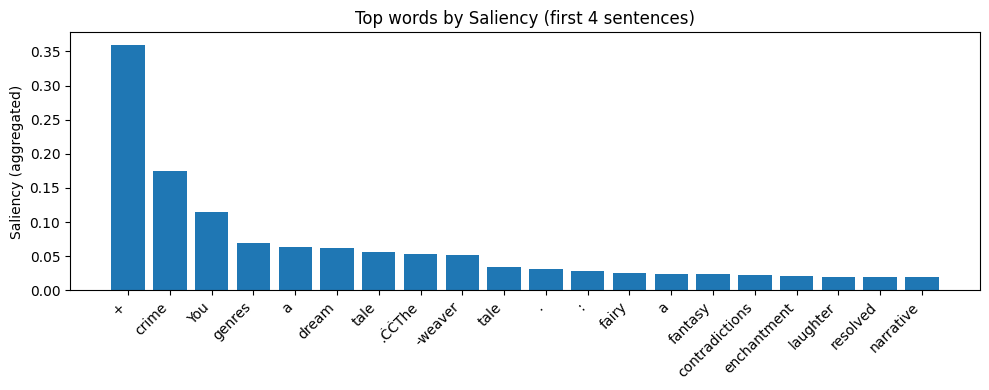

Results correctly exported in dir: falcon_results


<Figure size 640x480 with 0 Axes>

In [ ]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "tiiuae/Falcon3-1B-Instruct-1.58bit"
    prompt       = full_prompt
    max_new_tok  = 500
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "falcon_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.float().cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)

---

### GPT 3.5-Turbo (LOO Saliency)

In [23]:
# Setup
API_KEY = 'XXX'
openai.api_key = API_KEY
MODEL = "gpt-3.5-turbo-0125"
ENC   = tiktoken.encoding_for_model(MODEL)

# Trigger
def call_chat(system, user, max_tokens=500, temperature=0.7):
    resp = openai.chat.completions.create(
        model        = MODEL,
        messages     = [{"role":"system","content":system},
                        {"role":"user"  ,"content":user}],
        max_tokens   = max_tokens,
        temperature  = temperature,
        logprobs     = True,
        top_logprobs = 0
    )
    lp  = sum(tok.logprob for tok in resp.choices[0].logprobs.content)
    txt = resp.choices[0].message.content
    return lp, txt

# Loop on 6 prompts
out_dir = "gpt_results"
os.makedirs(out_dir, exist_ok=True)

for entry in system_prompts:
    tech       = entry["Technique"]
    system_msg = entry["System"]
    print("\n=== Technique:", tech, "===")

    tech_dir = f"{out_dir}/{tech}"
    os.makedirs(tech_dir, exist_ok=True)

    # baseline
    base_lp, answer = call_chat(system_msg, user_prompt)
    print(f"Baseline LP: {base_lp:.2f}")

    # prompt tokenization
    tok_ids  = ENC.encode(user_prompt)
    tok_strs = [ENC.decode([tid]) for tid in tok_ids]
    scores   = []

    # leave-one-out
    for i in tqdm(range(len(tok_ids)), desc=f"LOO-{tech}", leave=False):
        new_prompt = ENC.decode(tok_ids[:i] + tok_ids[i+1:])
        loo_lp, _  = call_chat(system_msg, new_prompt)
        scores.append({
            "idx": i,
            "token": tok_strs[i],
            "importance": base_lp - loo_lp
        })

    # save results
    #  answer
    with open(f"{tech_dir}/answer_{tech}.txt", "w", encoding="utf-8") as f:
        f.write(answer)

    #  LOO Scores
    df = pd.DataFrame(scores).sort_values("importance", ascending=False)
    df.to_csv(f"{tech_dir}/loo_importance_{tech}.csv", index=False)

    #  first 10 tokens print
    print(df.head(10))


=== Technique: Zero-Shot ===
Baseline LP: -138.62


    idx       token    importance
12   12     fantasy  10061.155131
3     3        will     53.690089
6     6         two     26.579448
8     8      genres      7.964150
7     7   following      0.155452
1     1       fairy     -0.073976
11   11           +     -3.722653
9     9           :     -5.299922
2     2        tale     -5.558757
4     4         mix    -18.168678

=== Technique: Role Prompting ===
Baseline LP: -183.24


    idx       token  importance
2     2        tale   29.104581
10   10       crime   26.028480
3     3        will   25.784146
4     4         mix   17.246051
9     9           :   13.438687
8     8      genres    9.735638
1     1       fairy    9.708762
7     7   following    1.199384
5     5         the   -1.252553
6     6         two   -4.953188

=== Technique: Few-Shot ===
Baseline LP: -165.46


    idx       token    importance
9     9           :  20005.266477
7     7   following     20.995746
12   12     fantasy     19.863817
11   11           +     10.910603
4     4         mix     10.135671
0     0         The      6.570389
1     1       fairy     -2.873209
8     8      genres     -5.453833
3     3        will     -6.557324
2     2        tale     -9.970079

=== Technique: Style Prompting ===
Baseline LP: -220.40


    idx       token   importance
11   11           +  9985.084894
12   12     fantasy  9980.422893
4     4         mix  9965.833209
3     3        will    -9.073953
9     9           :   -18.483285
7     7   following   -33.590878
10   10       crime   -35.735666
5     5         the   -38.950312
2     2        tale   -48.435219
0     0         The   -52.419844

=== Technique: Emotion + Zero-Shot ===
Baseline LP: -191.28


    idx       token   importance
7     7   following  9989.304789
12   12     fantasy  9958.508228
0     0         The    16.104479
3     3        will    10.925681
1     1       fairy     5.706882
9     9           :    -1.466434
2     2        tale    -5.335369
11   11           +    -8.263916
8     8      genres   -12.127740
6     6         two   -40.142984

=== Technique: Emotion + Role Prompting ===
Baseline LP: -158.46


    idx       token   importance
11   11           +  9966.709514
0     0         The    25.500906
3     3        will     7.139090
12   12     fantasy     2.558543
10   10       crime    -2.076867
8     8      genres    -4.996638
6     6         two    -5.421513
7     7   following    -7.555522
4     4         mix   -13.815587
5     5         the   -16.889881
